In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/LoanApproval/loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
columns = df.columns.tolist()
for col in columns:
    print(col)

loan_id
no_of_dependents
education
self_employed
income_annum
loan_amount
loan_term
cibil_score
residential_assets_value
commercial_assets_value
luxury_assets_value
bank_asset_value
loan_status


In [4]:
df.shape

(4269, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [7]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [8]:
df.duplicated().sum()

0

# EDA

<Axes: xlabel='education', ylabel='count'>

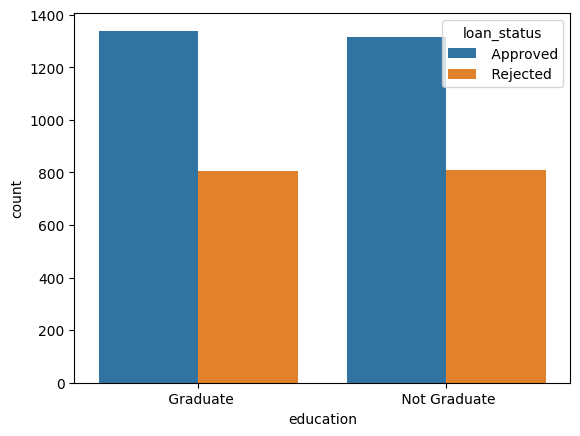

In [9]:
sns.countplot(x=df['education'], hue=df['loan_status'])

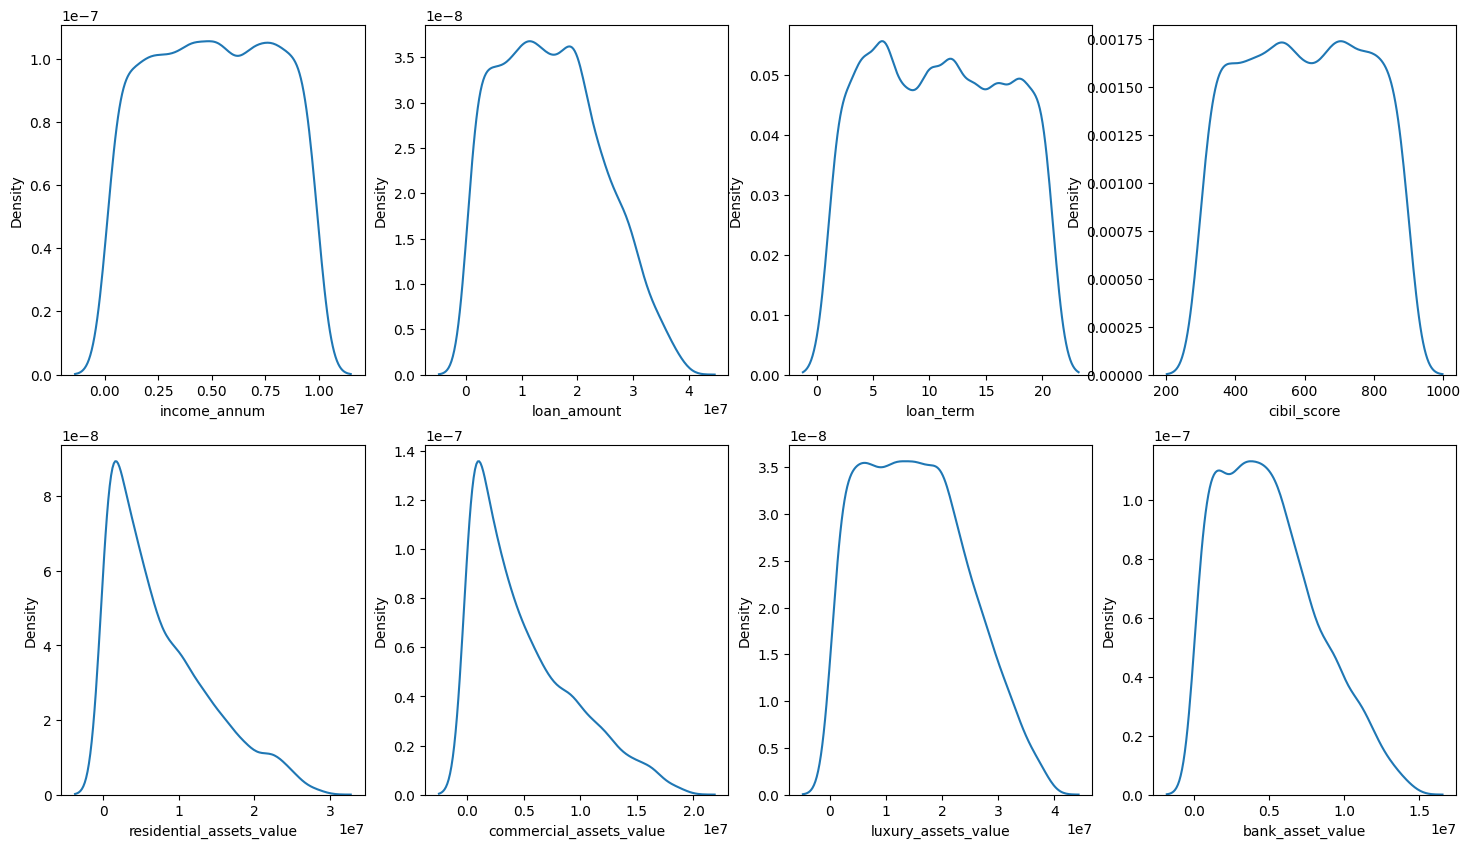

In [10]:
cols_dist = ['income_annum','loan_amount','loan_term','cibil_score','residential_assets_value', 'commercial_assets_value', 'luxury_assets_value','bank_asset_value']
plt.figure(figsize=(18, 10))
itr = 1
for i in cols_dist:
    plt.subplot(2,4,itr)
    sns.kdeplot(df[i])
    itr += 1

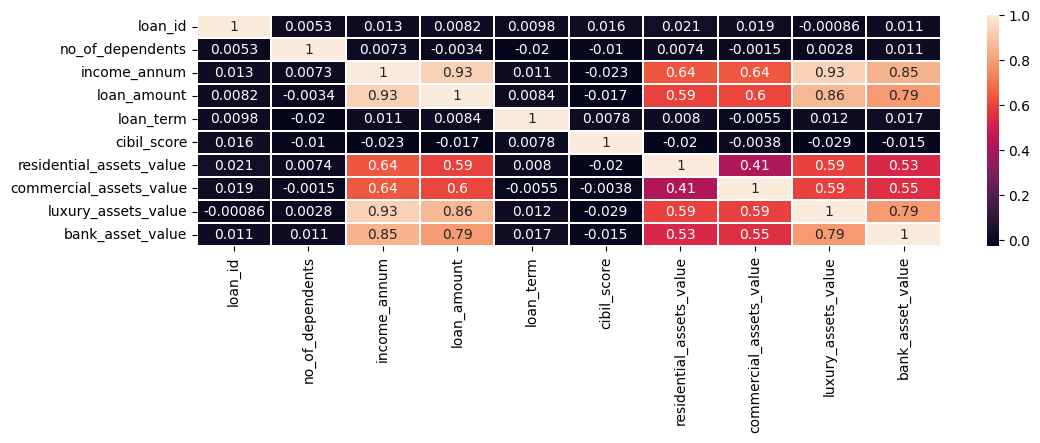

In [11]:
plt.figure(figsize=(12,3))
sns.heatmap(df.corr(), linewidth=0.1, annot=True)
plt.show()

# Feature engineering

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [13]:
numcol = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

In [14]:
scaler = StandardScaler()
for col in numcol:
    df[[col]] = scaler.fit_transform(df[[col]])

In [15]:
le = LabelEncoder()
df["education"]=le.fit_transform(df["education"])
df["self_employed"]=le.fit_transform(df["self_employed"])
df["loan_status"]=le.fit_transform(df["loan_status"])
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,0
1,2,0,1,1,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,1
2,3,3,0,0,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,1
3,4,3,0,0,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,1
4,5,5,1,1,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,1


In [16]:
df = df.drop('loan_id',axis=1)

In [17]:
X = df.drop("loan_status",axis = 1)
y = df['loan_status']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

# Logistic Regression

In [45]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_predict = lr.predict(X_test)
print("Training score :{}".format(lr.score(X_train, y_train)))
print("Testing score :{}".format(lr.score(X_test, y_test)))

Training score :0.9203417861080485
Testing score :0.9141965678627145


In [21]:
confusion_matrix(y_true=y_test, y_pred=lr_predict)

array([[377,  31],
       [ 24, 209]])

## Hyperparameter tuning
### K-fold validation

In [49]:
# creating a KFold object with 5 splits
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

model = LogisticRegression()

In [50]:
# computing the cross-validation scores
# Note that the argument cv takes the 'folds' object, and
# we have specified 'accuracy' as the metric

cv_results = cross_val_score(model, X_train, y_train, cv = folds, scoring = 'accuracy')

In [52]:
# print 5 accuracies obtained from the 5 folds
print(cv_results)
print("Mean accuracy of Logistic Regression = {}".format(cv_results.mean()))

[0.91597796 0.92837466 0.9214876  0.91034483 0.91310345]
Mean accuracy of Logistic Regression = 0.9178576992495489


### GridSearchCV

In [58]:
# Grid search cross validation
hyperparameter_grid={"C":[0.1, 1, 10, 100, 1000], "penalty":["l1","l2"]}# l1 lasso l2 ridge

logreg = LogisticRegression()
logreg_cv = GridSearchCV(estimator=logreg,
                         scoring='accuracy',
                         param_grid=hyperparameter_grid,
                         cv=folds,
                         return_train_score=True)

logreg_cv.fit(X_train, y_train)

print("Tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("Accuracy :",logreg_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2'}
Accuracy : 0.9178576992495489


In [59]:
# cv results
cv_results = pd.DataFrame(logreg_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001237,0.000770,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,...,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.014343,0.003980,0.002074,0.000412,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.913223,0.925620,0.922865,...,0.917583,0.006097,2,0.920400,0.916265,0.920400,0.915949,0.920772,0.918757,0.002170
2,0.000716,0.000022,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,...,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.010367,0.000208,0.001733,0.000122,1,l2,"{'C': 1, 'penalty': 'l2'}",0.915978,0.928375,0.921488,...,0.917858,0.006424,1,0.921089,0.918677,0.917988,0.913538,0.920427,0.918344,0.002654
4,0.000699,0.000015,0.000000,0.000000,10,l1,"{'C': 10, 'penalty': 'l1'}",NaN,NaN,NaN,...,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.010391,0.000667,0.001726,0.000074,10,l2,"{'C': 10, 'penalty': 'l2'}",0.914601,0.924242,0.921488,...,0.917032,0.005079,3,0.920055,0.917643,0.918332,0.914227,0.919738,0.917999,0.002084
6,0.000715,0.000051,0.000000,0.000000,100,l1,"{'C': 100, 'penalty': 'l1'}",NaN,NaN,NaN,...,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.010162,0.000635,0.001786,0.000101,100,l2,"{'C': 100, 'penalty': 'l2'}",0.914601,0.924242,0.921488,...,0.917032,0.005079,3,0.920055,0.917298,0.918332,0.914227,0.919738,0.917930,0.002101
8,0.000734,0.000069,0.000000,0.000000,1000,l1,"{'C': 1000, 'penalty': 'l1'}",NaN,NaN,NaN,...,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.010504,0.000336,0.001989,0.000091,1000,l2,"{'C': 1000, 'penalty': 'l2'}",0.914601,0.924242,0.921488,...,0.917032,0.005079,3,0.920055,0.917298,0.918332,0.914227,0.919738,0.917930,0.002101


In [64]:
best_score = logreg_cv.best_score_
best_C = logreg_cv.best_params_['C']
best_penalty = logreg_cv.best_params_['penalty']

print(" The highest test accuracy is {0} at C = {1} and Penalty={2}".format(best_score, best_C, best_penalty))

 The highest test accuracy is 0.9178576992495489 at C = 1 and Penalty=l2


In [81]:
# model with the best value of C and penalty
lr = LogisticRegression(C=best_C, penalty=best_penalty)

# fit
lr.fit(X_train, y_train)

# predict
y_pred = lr.predict(X_test)

In [82]:
# accuracy
print("accuracy", accuracy_score(y_test, y_pred))

# precision
print("precision", precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", recall_score(y_test, y_pred))

accuracy 0.9157566302652106
precision 0.8744769874476988
recall 0.8969957081545065


## Support Vector Machine

In [68]:
svm = SVC()
svm.fit(X_train, y_train)

svm_predict = svm.predict(X_test)
print("Training score :{}".format(svm.score(X_train, y_train)))
print("Testing score :{}".format(svm.score(X_test, y_test)))

Training score :0.9492833517089305
Testing score :0.9266770670826833


In [69]:
confusion_matrix(y_true=y_test, y_pred=lr_predict)

array([[377,  31],
       [ 24, 209]])

## Hyperparameter tuning
### K-fold Validation

In [72]:
# creating a KFold object with 5 splits
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

svm_model = SVC()

In [73]:
# computing the cross-validation scores
# Note that the argument cv takes the 'folds' object, and
# we have specified 'accuracy' as the metric

cv_results = cross_val_score(svm_model, X_train, y_train, cv = folds, scoring = 'accuracy')

In [74]:
# print 5 accuracies obtained from the 5 folds
print(cv_results)
print("Mean accuracy of Logistic Regression = {}".format(cv_results.mean()))

[0.93801653 0.92699725 0.93939394 0.94206897 0.93931034]
Mean accuracy of Logistic Regression = 0.93715740476869


### GridSearchCv

In [75]:
# Grid search cross validation
hyperparameter_grid={"C":[0.1, 1, 10, 100, 1000]}

svm_model = SVC()
svm_cv = GridSearchCV(estimator=svm_model,
                         scoring='accuracy',
                         param_grid=hyperparameter_grid,
                         cv=folds,
                         return_train_score=True)

svm_cv.fit(X_train, y_train)

print("Tuned hpyerparameters :(best parameters) ", svm_cv.best_params_)
print("Accuracy :", svm_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'C': 10}
Accuracy : 0.9476318039327444


In [76]:
# cv results
cv_results = pd.DataFrame(logreg_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001237,0.000770,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,...,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.014343,0.003980,0.002074,0.000412,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.913223,0.925620,0.922865,...,0.917583,0.006097,2,0.920400,0.916265,0.920400,0.915949,0.920772,0.918757,0.002170
2,0.000716,0.000022,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,...,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.010367,0.000208,0.001733,0.000122,1,l2,"{'C': 1, 'penalty': 'l2'}",0.915978,0.928375,0.921488,...,0.917858,0.006424,1,0.921089,0.918677,0.917988,0.913538,0.920427,0.918344,0.002654
4,0.000699,0.000015,0.000000,0.000000,10,l1,"{'C': 10, 'penalty': 'l1'}",NaN,NaN,NaN,...,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.010391,0.000667,0.001726,0.000074,10,l2,"{'C': 10, 'penalty': 'l2'}",0.914601,0.924242,0.921488,...,0.917032,0.005079,3,0.920055,0.917643,0.918332,0.914227,0.919738,0.917999,0.002084
6,0.000715,0.000051,0.000000,0.000000,100,l1,"{'C': 100, 'penalty': 'l1'}",NaN,NaN,NaN,...,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.010162,0.000635,0.001786,0.000101,100,l2,"{'C': 100, 'penalty': 'l2'}",0.914601,0.924242,0.921488,...,0.917032,0.005079,3,0.920055,0.917298,0.918332,0.914227,0.919738,0.917930,0.002101
8,0.000734,0.000069,0.000000,0.000000,1000,l1,"{'C': 1000, 'penalty': 'l1'}",NaN,NaN,NaN,...,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.010504,0.000336,0.001989,0.000091,1000,l2,"{'C': 1000, 'penalty': 'l2'}",0.914601,0.924242,0.921488,...,0.917032,0.005079,3,0.920055,0.917298,0.918332,0.914227,0.919738,0.917930,0.002101


In [79]:
best_score = svm_cv.best_score_
best_C = svm_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.9476318039327444 at C = 10


In [83]:
# model with the best value of C and penalty
svm_best = LogisticRegression(C=best_C)

# fit
svm_best.fit(X_train, y_train)

# predict
y_pred = svm_best.predict(X_test)

In [84]:
# accuracy
print("accuracy", accuracy_score(y_test, y_pred))

# precision
print("precision", precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", recall_score(y_test, y_pred))

accuracy 0.9157566302652106
precision 0.8744769874476988
recall 0.8969957081545065


## Naive Bayes Classifier

In [88]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_train, y_train)

0.9349503858875413

In [86]:
import pickle

In [90]:
filename1='logistic_model.sav'
filename2='naive_bayes_model.sav'
filename3='svm_model.sav'

pickle.dump(lr, open(filename1, 'wb'))
pickle.dump(nb, open(filename2, 'wb'))
pickle.dump(svm_best, open(filename3, 'wb'))